# First Name: Kantapong
# Last Name: Wongsanguan

# Import Libraries  

In [56]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [57]:
bottle = pd.read_csv('Bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# Data management 

In [58]:
# The two variables to be used are the temperature and salinity of the water.
bottle["T_degC"] = pd.to_numeric(bottle["T_degC"], errors="coerce")
bottle["Salnty"] = pd.to_numeric(bottle["Salnty"], errors="coerce")

count   853900.000000
mean        10.799677
std          4.243825
min          1.440000
25%          7.680000
50%         10.060000
75%         13.880000
max         31.140000
Name: T_degC, dtype: float64


C:\Users\kanta\AppData\Local\Temp\ipykernel_8164\2188345800.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bottle["T_degC"].dropna(), kde=False);


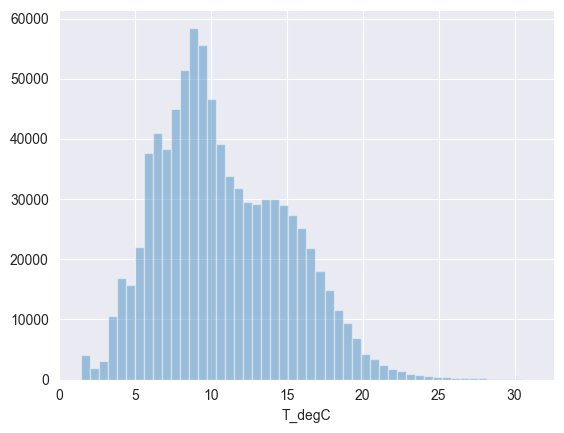

In [59]:
# Plot histogram for water temperature.
print(bottle["T_degC"].describe())
sns.distplot(bottle["T_degC"].dropna(), kde=False);

count   817509.000000
mean        33.840350
std          0.461843
min         28.431000
25%         33.488000
50%         33.863000
75%         34.196900
max         37.034000
Name: Salnty, dtype: float64


C:\Users\kanta\AppData\Local\Temp\ipykernel_8164\937585951.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bottle["Salnty"].dropna(), kde=False);


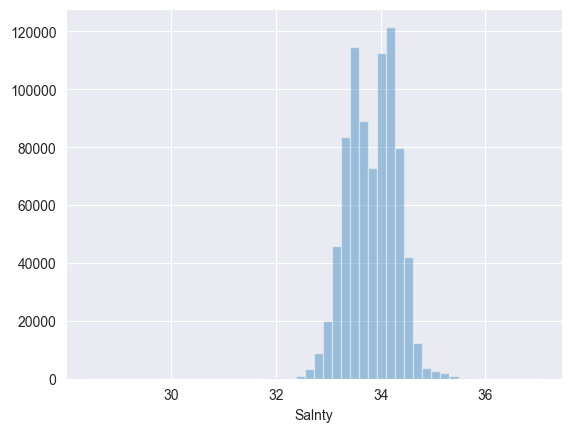

In [60]:
# Plot histogram for salinity.
print(bottle["Salnty"].describe())
sns.distplot(bottle["Salnty"].dropna(), kde=False);

C:\Users\kanta\AppData\Local\Temp\ipykernel_8164\1285674330.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sub1["T_degC"].dropna(), kde=False);


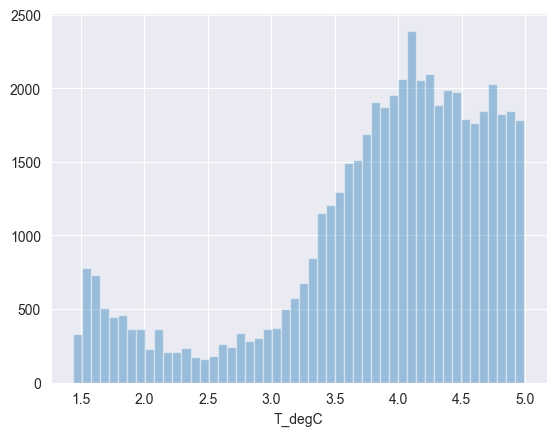

In [61]:
# Obtain a subset of the data for water temperatures up to 5 degrees.
# We are only interested in the relationship to salinity for very cold water.
sub1 = bottle[(bottle["T_degC"] < 5)].copy()
sns.distplot(sub1["T_degC"].dropna(), kde=False);

In [62]:
# Obtain another subset containing only the required variables and with no null values.
sub2 = sub1[["T_degC", "Salnty"]].dropna()

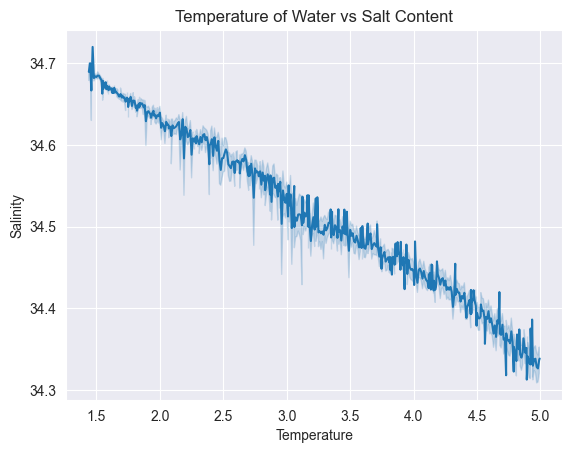

In [63]:
%matplotlib inline
# Plot water temperature vs salinity.
# The graph shows a decreasing relationship between these two variables.
sns.lineplot(x="T_degC", y="Salnty", data=sub2)
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Temperature of Water vs Salt Content");

In [64]:
# Cut water temperature into 4 categories with labels from 1 to 4.
# As there are no temperature values < 1, the 0-1 and 1-2 bins are combined.
sub2["TEMP_CAT"] = pd.cut(sub2["T_degC"], [0, 2, 3, 4, 5], labels=[1, 2, 3, 4])
sub2["TEMP_CAT"].value_counts(sort=False, dropna=False)

TEMP_CAT
1     3556
2     3195
3    14681
4    23422
Name: count, dtype: int64

In [65]:
# Cut water salinity into 2 categories and digitize.
sub2["SAL_CAT"] = np.digitize(sub2["Salnty"], bins=[34.5])
sub2["SAL_CAT"].value_counts(sort=False, dropna=False)

SAL_CAT
0    28661
1    16193
Name: count, dtype: int64

# Chart/Plot

C:\Users\kanta\AppData\Local\Temp\ipykernel_8164\1695646028.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="TEMP_CAT", y="SAL_CAT", data=sub2, ci=None);


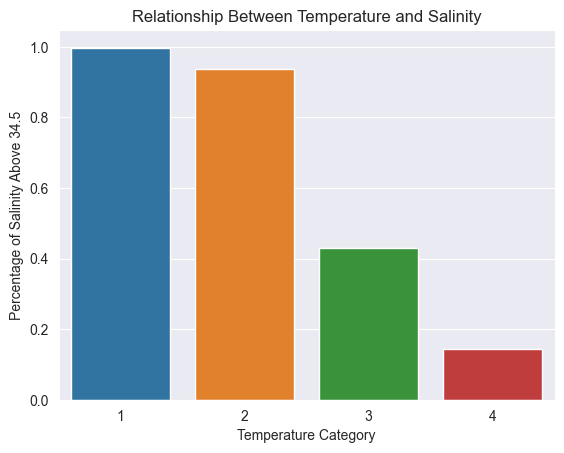

In [66]:
%matplotlib inline
# Visualize relationship between temperature and salinity with a box plot.
# The box plot shows that as temperature increases, the percentage of salinity values above 34.5 decreases.
sns.barplot(x="TEMP_CAT", y="SAL_CAT", data=sub2, ci=None);

#Set labels and title
plt.xlabel("Temperature Category")
plt.ylabel("Percentage of Salinity Above 34.5")
plt.title("Relationship Between Temperature and Salinity");

# CHI_Squared

In [67]:
# Create cross-table between salinity and temperature.
ct1 = pd.crosstab(sub2["SAL_CAT"], sub2["TEMP_CAT"])
print(ct1)

TEMP_CAT     1     2     3      4
SAL_CAT                          
0            8   204  8363  20086
1         3548  2991  6318   3336


In [68]:
# Convert values to percentages.
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

TEMP_CAT        1        2        3        4
SAL_CAT                                     
0        0.002250 0.063850 0.569648 0.857570
1        0.997750 0.936150 0.430352 0.142430


In [69]:
# Perform chi-squared contingency test.
# Chi-squared value: 15988.2675
# p-value: 0.0
# p-value is < 0.05, reject null hypothesis.
print('chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

chi-square value, p value, expected counts
Chi2ContingencyResult(statistic=15988.267523279752, pvalue=0.0, dof=3, expected_freq=array([[ 2272.22802872,  2041.55471084,  9380.9279217 , 14966.28933874],
       [ 1283.77197128,  1153.44528916,  5300.0720783 ,  8455.71066126]]))


In [70]:
# Perform post-hoc analysis between different temperature categories.
# All p-values are < 0.0083 (0.05 / 6), therefore there is a significant
# difference in salinity readings above 34.5 between all temperature categories.
sub3 = sub2.copy()
cat = [1, 2, 3, 4]

for x in range(0,len(cat)-1):
    for y in range(x+1,len(cat)):
        recode = { cat[x]:cat[x], cat[y]:cat[y]}
        sub3['temp'] = sub3['TEMP_CAT'].map(recode)
        cont=pd.crosstab(sub3['SAL_CAT'], sub3['temp'])
        cs= scipy.stats.chi2_contingency(cont)
        print("\n", cat[x], " versus ", cat[y],
              "Chi value: ", cs[0], "\t\tp value: ", cs[1])



 1  versus  2 Chi value:  207.9295410246399 		p value:  3.886795514368588e-47

 1  versus  3 Chi value:  3709.0330728229574 		p value:  0.0

 1  versus  4 Chi value:  11879.032761438164 		p value:  0.0

 2  versus  3 Chi value:  2687.7700538025792 		p value:  0.0

 2  versus  4 Chi value:  9770.439849917746 		p value:  0.0

 3  versus  4 Chi value:  3953.1829453406053 		p value:  0.0
